In [411]:
from utils.file_utils import add_project_dirs_to_path

# Add project root and src directory to Python path
add_project_dirs_to_path()

# Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Import from project modules
# from pi_vae.pi_vae import *
# from pi_vae.util import *
from modeling.vae_model import *
from utils.data_processing import *
from utils.plotting import *

# Import Keras callback
from keras.callbacks import ModelCheckpoint

# Import plot packages
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import seaborn

# Suppress warnings
warnings.filterwarnings("ignore")

# Autoreload modules
%load_ext autoreload
%autoreload 2

# Show plots inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

- This notebook will focus primarily on the visual cortex, because there is a stronger signal to noise ratio for purely visual behavior variables.
- Additionally, I have been spooked to look at each brain region independently
- Also go spooked that there are outliers in the kinematics information (Velocity, position, total distance)

In [412]:
VERSION = 2
LATENT_DIM = 10
RANDOM_SEED = 999
BRAIN_REGIONS = ['CA1', 'VISp']
MODEL_TYPES = ['vae', 'pivae']

# Save Plots flags
SAVE_VAL_PLOTS = False
SAVE_LATENT_PLOTS = True

# Show Plots flags
SHOW_VAL_PLOTS = False
SHOW_LATENT_PLOTS = True

# Flag for if this is training iteration
TRAINING =  False


### Extract data

In [413]:
ecephys_session_id = 766640955
brain_region = BRAIN_REGIONS[1]

spike_count_pivot, behavior_data_df = extract_data(ecephys_session_id, brain_region)

## Workflows

### Pi-VAE - X_v, F

#### Transform Data

In [414]:
selected_behavior_vars = ['frame']

x_all, u_all = transform_data(spike_count_pivot, behavior_data_df, selected_behavior_vars)

#### Load Data

In [415]:
x_train, u_train, x_valid, u_valid, x_test, u_test = load_data(x_all=x_all, u_all=u_all)

In [416]:
model_chk_path, workflow_name = get_model_paths(brain_region=brain_region,
                                    selected_behavior_vars=selected_behavior_vars, 
                                    latent_dim=LATENT_DIM, 
                                    random_seed=RANDOM_SEED, 
                                    model_type=MODEL_TYPES[1]);

In [417]:
# Initialize model
vae = initialize_model(dim_x=x_all[0].shape[-1], 
                       dim_z=LATENT_DIM,
                       dim_u=u_all[0].shape[-1], 
                       gen_nodes=60, n_blk=2, mdl='poisson', disc=False, learning_rate=5e-4, random_seed=RANDOM_SEED)

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_52 (InputLayer)       [(None, 49)]                 0         []                            
                                                                                                  
 input_54 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 encoder (Functional)        [(None, 10),                 15420     ['input_52[0][0]',            
                              (None, 10),                            'input_54[0][0]']            
                              (None, 10),                                                         
                              (None, 10),                                                       

In [418]:
# Train model
if TRAINING:
    s_n = train_model(vae, x_train, u_train, x_valid, u_valid, model_chk_path)

    plot_validation_loss(s_n, workflow_name, VERSION, save_plot=SAVE_VAL_PLOTS, show_plot=SHOW_VAL_PLOTS)

In [419]:
outputs = inference(vae, x_all, u_all, model_chk_path) # post_mean, post_log_var, z_sample,fire_rate, lam_mean, lam_log_var, z_mean, z_log_var

##### TODO: clean/Package this variance compute and sort code

In [420]:
# Calculate variances of all columns of outputs[0]
variances = outputs[0].var(axis=0)

# Sort the columns by variance in descending order and get the indices
sorted_indices = np.argsort(variances)[::-1]

# Create a new object containing the columns of outputs[0] sorted by variance
sorted_outputs = outputs[0][:, sorted_indices]

print(sorted_outputs.var(axis=0))

[1.8014930e+00 5.2952099e-01 3.9565796e-01 1.0131825e-01 4.0950395e-02
 3.7430849e-02 2.6939096e-02 6.9176755e-03 1.9900755e-03 1.9533213e-04]


#### Plotting

Latent 1 idx: 0
Latent 2 idx: 1


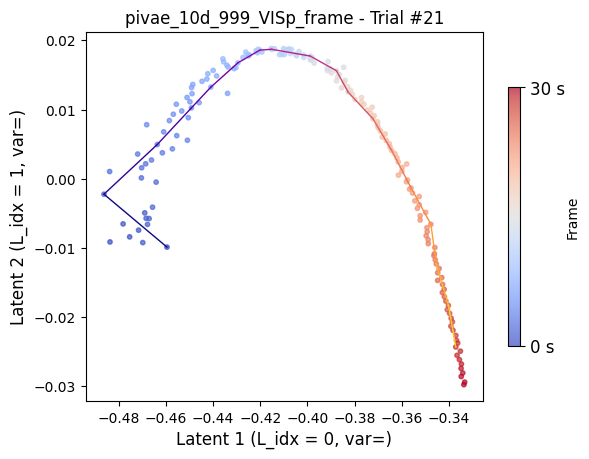

In [421]:
plot_single_latent_trajectory(outputs, sorted_indices, workflow_name, save_plot=False, save_dir=None, show_plot=True)

Latent 1 idx: 0
Latent 2 idx: 1


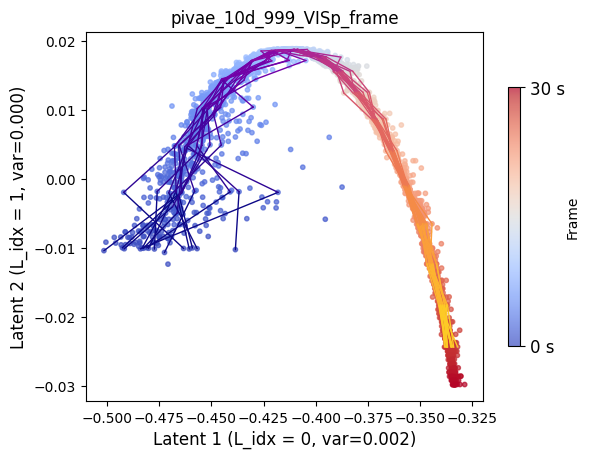

Latent 1 idx: 0
Latent 2 idx: 1


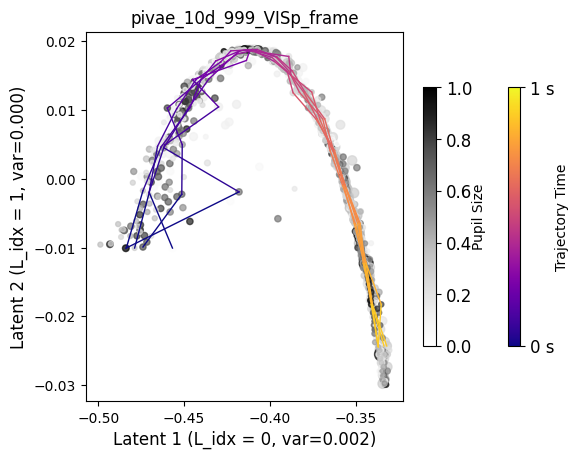

In [422]:
plot_dir = get_plot_dir(workflow_name, version_number=VERSION, plot_type='latent')

plot_multi_latent_trajectory(outputs, sorted_indices, workflow_name, variances=variances, num_stims=15, save_plot=SAVE_LATENT_PLOTS, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

# plot_multi_latent_trajectory_pupil_v4(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=5, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

### Pi-VAE - X_v, P

#### Transform Data

In [ ]:
selected_behavior_vars = ['pupil_size']

x_all, u_all = transform_data(spike_count_pivot, behavior_data_df, selected_behavior_vars)

#### Load Data

In [ ]:
x_train, u_train, x_valid, u_valid, x_test, u_test = load_data(x_all=x_all, u_all=u_all)

In [ ]:
model_chk_path, workflow_name = get_model_paths(brain_region=brain_region,
                                    selected_behavior_vars=selected_behavior_vars, 
                                    latent_dim=LATENT_DIM, 
                                    random_seed=RANDOM_SEED, 
                                    model_type=MODEL_TYPES[1]);

print(f"Workflow Name: {workflow_name}")

Workflow Name: pivae_10d_999_VISp_pupil_size


In [ ]:
# Initialize model
vae = initialize_model(dim_x=x_all[0].shape[-1], 
                       dim_z=LATENT_DIM,
                       dim_u=u_all[0].shape[-1], 
                       gen_nodes=60, n_blk=2, mdl='poisson', disc=False, learning_rate=5e-4, random_seed=RANDOM_SEED)

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_46 (InputLayer)       [(None, 49)]                 0         []                            
                                                                                                  
 input_48 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 encoder (Functional)        [(None, 10),                 15420     ['input_46[0][0]',            
                              (None, 10),                            'input_48[0][0]']            
                              (None, 10),                                                         
                              (None, 10),                                                       

In [ ]:
# Train model
if TRAINING:
    s_n = train_model(vae, x_train, u_train, x_valid, u_valid, model_chk_path)

    plot_validation_loss(s_n, workflow_name, VERSION, save_plot=SAVE_VAL_PLOTS, show_plot=SHOW_VAL_PLOTS)

In [ ]:
outputs = inference(vae, x_all, u_all, model_chk_path) # post_mean, post_log_var, z_sample,fire_rate, lam_mean, lam_log_var, z_mean, z_log_var

##### TODO: clean/Package this variance compute and sort code

In [ ]:
# Calculate variances of all columns of outputs[0]
variances = outputs[0].var(axis=0)

# Sort the columns by variance in descending order and get the indices
sorted_indices = np.argsort(variances)[::-1]

# Create a new object containing the columns of outputs[0] sorted by variance
sorted_outputs = outputs[0][:, sorted_indices]

print(sorted_outputs.var(axis=0))

[1.0735191  0.46052316 0.3766731  0.1253999  0.12417075 0.08977513
 0.02406693 0.0234289  0.01679448 0.00156747]


#### Plotting

Latent 1 idx: 3
Latent 2 idx: 6


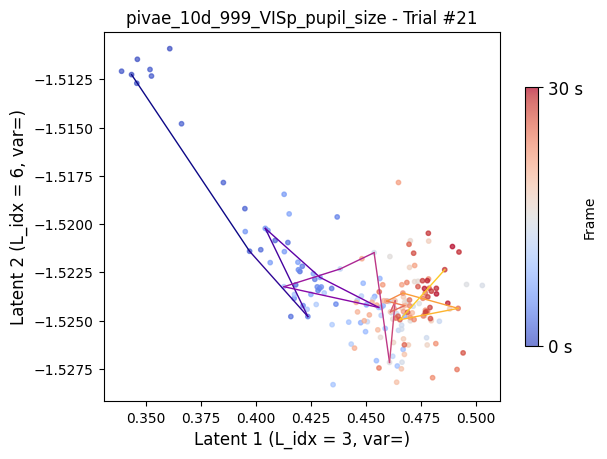

In [ ]:
plot_single_latent_trajectory(outputs, sorted_indices, workflow_name, save_plot=False, save_dir=None, show_plot=True)

Latent 1 idx: 3
Latent 2 idx: 6


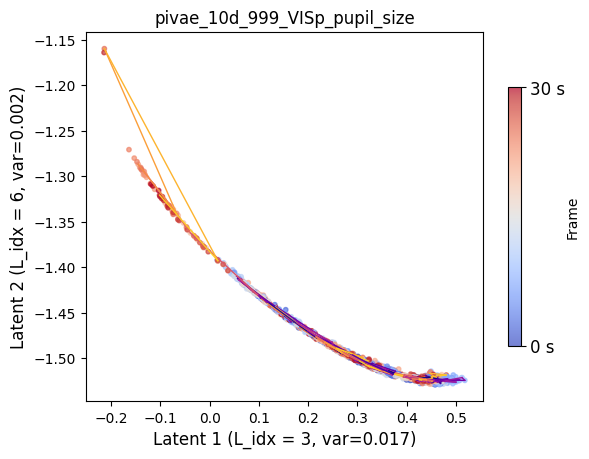

Latent 1 idx: 8
Latent 2 idx: 7


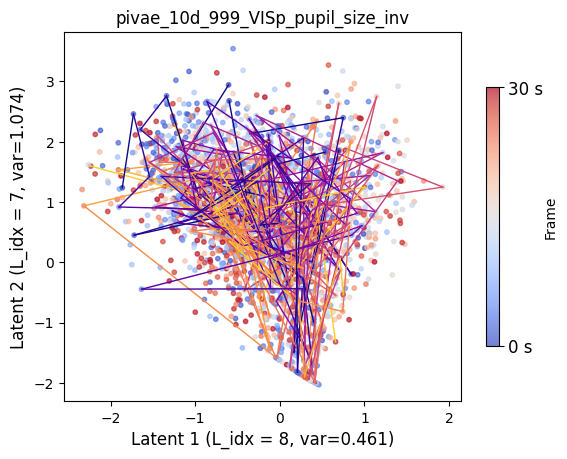

In [ ]:
plot_dir = get_plot_dir(workflow_name, version_number=VERSION, plot_type='latent')

plot_multi_latent_trajectory(outputs, sorted_indices, workflow_name, variances=variances, num_stims=15, save_plot=SAVE_LATENT_PLOTS, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

# plot_multi_latent_trajectory_pupil_v4(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=5, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

### Pi-VAE - X_v, F, P

#### Transform Data

In [ ]:
selected_behavior_vars = ['frame', 'pupil_size']

x_all, u_all = transform_data(spike_count_pivot, behavior_data_df, selected_behavior_vars)

#### Load Data

In [ ]:
x_train, u_train, x_valid, u_valid, x_test, u_test = load_data(x_all=x_all, u_all=u_all)

In [ ]:
model_chk_path, workflow_name = get_model_paths(brain_region=brain_region,
                                    selected_behavior_vars=selected_behavior_vars, 
                                    latent_dim=LATENT_DIM, 
                                    random_seed=RANDOM_SEED, 
                                    model_type=MODEL_TYPES[1]);

print(f"Workflow Name: {workflow_name}")

Workflow Name: pivae_10d_999_VISp_frame_pupil_size


In [ ]:
# Initialize model
vae = initialize_model(dim_x=x_all[0].shape[-1], 
                       dim_z=LATENT_DIM,
                       dim_u=u_all[0].shape[-1], 
                       gen_nodes=60, n_blk=2, mdl='poisson', disc=False, learning_rate=5e-4, random_seed=RANDOM_SEED)

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 49)]                 0         []                            
                                                                                                  
 input_45 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 encoder (Functional)        [(None, 10),                 15440     ['input_43[0][0]',            
                              (None, 10),                            'input_45[0][0]']            
                              (None, 10),                                                         
                              (None, 10),                                                       

In [ ]:
# Train model
if TRAINING:
    s_n = train_model(vae, x_train, u_train, x_valid, u_valid, model_chk_path)

    plot_validation_loss(s_n, workflow_name, VERSION, save_plot=SAVE_VAL_PLOTS, show_plot=SHOW_VAL_PLOTS)

In [ ]:
outputs = inference(vae, x_all, u_all, model_chk_path) # post_mean, post_log_var, z_sample,fire_rate, lam_mean, lam_log_var, z_mean, z_log_var

##### TODO: clean/Package this variance compute and sort code

In [ ]:
# Calculate variances of all columns of outputs[0]
variances = outputs[0].var(axis=0)

# Sort the columns by variance in descending order and get the indices
sorted_indices = np.argsort(variances)[::-1]

# Create a new object containing the columns of outputs[0] sorted by variance
sorted_outputs = outputs[0][:, sorted_indices]

print(sorted_outputs.var(axis=0))

[0.9506711  0.4975051  0.37702808 0.30001393 0.17538214 0.09012078
 0.08345063 0.06601878 0.06601536 0.02192443]


#### Plotting

Latent 1 idx: 8
Latent 2 idx: 9


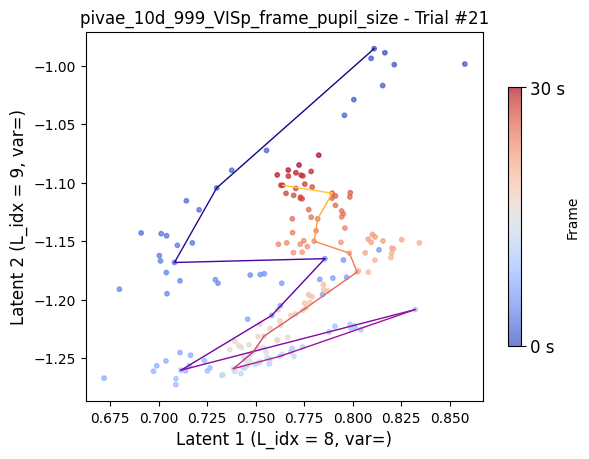

In [ ]:
plot_single_latent_trajectory(outputs, sorted_indices, workflow_name, save_plot=False, save_dir=None, show_plot=True)

Latent 1 idx: 8
Latent 2 idx: 9


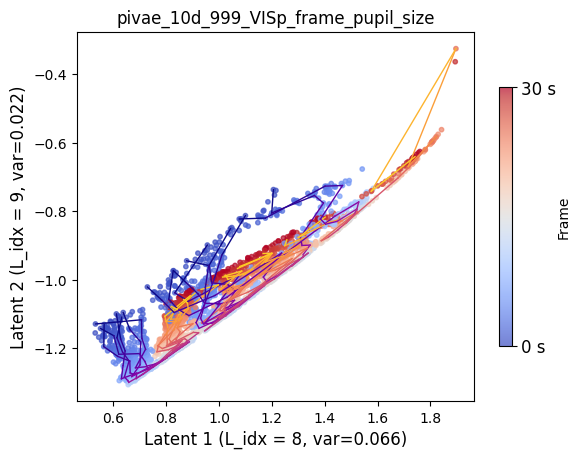

Latent 1 idx: 2
Latent 2 idx: 3


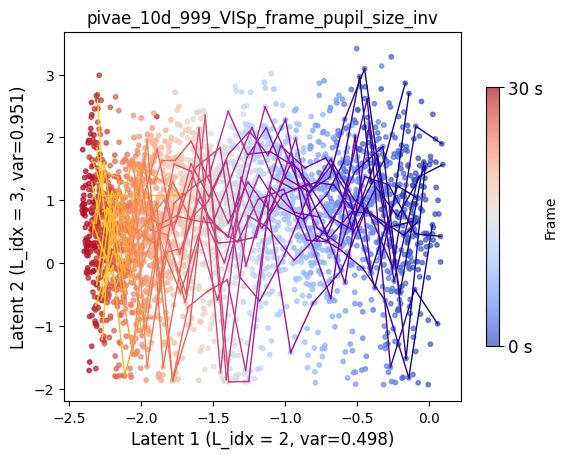

Latent 1 idx: 6
Latent 2 idx: 2


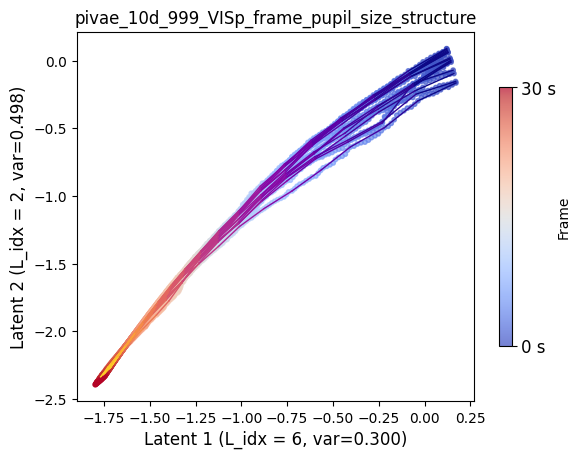

In [ ]:
plot_dir = get_plot_dir(workflow_name, version_number=VERSION, plot_type='latent')

# plot_multi_latent_trajectory(outputs, sorted_indices, workflow_name, variances=variances, num_stims=5, save_plot=SAVE_LATENT_PLOTS, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

plot_multi_latent_trajectory_pupil_v4(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=5, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

### Testing diffrent plot types to accomadate both Frame and pupil size

In [ ]:
from utils.plotting import *

Latent 1 idx: 8
Latent 2 idx: 9


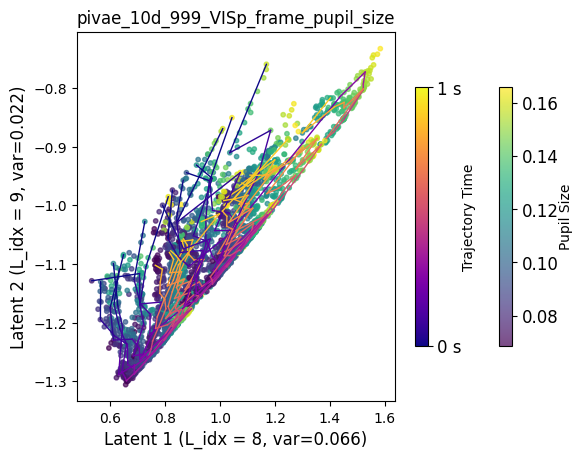

In [ ]:
plot_multi_latent_trajectory_pupil(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=15, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

Latent 1 idx: 8
Latent 2 idx: 9


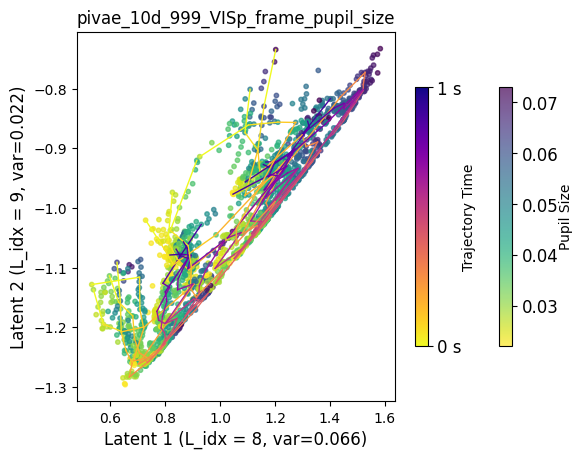

In [ ]:
plot_multi_latent_trajectory_pupil_v2(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=10, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

Latent 1 idx: 2
Latent 2 idx: 3


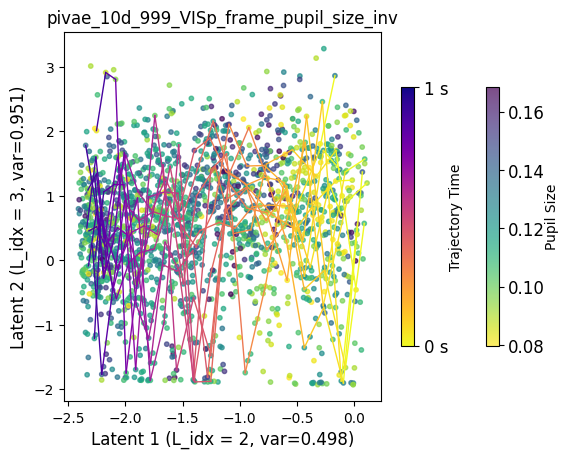

In [ ]:
plot_multi_latent_trajectory_pupil_v2(behavior_data_df, outputs, sorted_indices[::-1], workflow_name+'_inv', variances=variances, num_stims=10, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

Latent 1 idx: 8
Latent 2 idx: 9


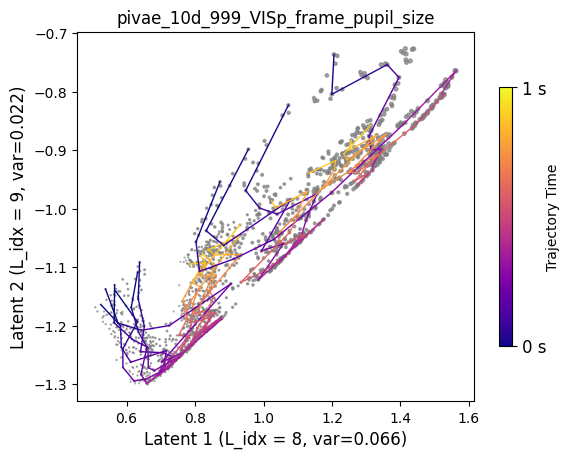

Latent 1 idx: 2
Latent 2 idx: 3


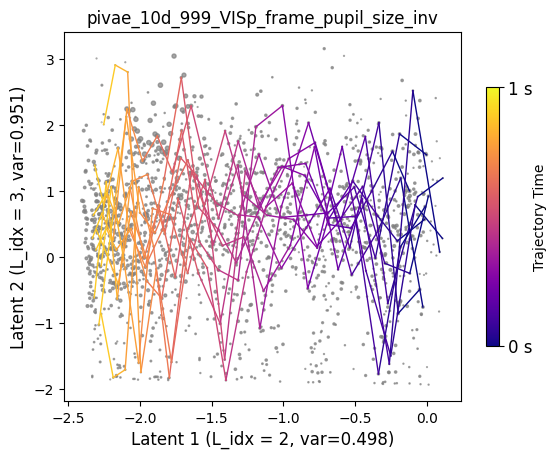

In [ ]:
plot_multi_latent_trajectory_pupil_v3(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=10, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

plot_multi_latent_trajectory_pupil_v3(behavior_data_df, outputs, sorted_indices[::-1], workflow_name+'_inv', variances=variances, num_stims=10, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)

Latent 1 idx: 0
Latent 2 idx: 1


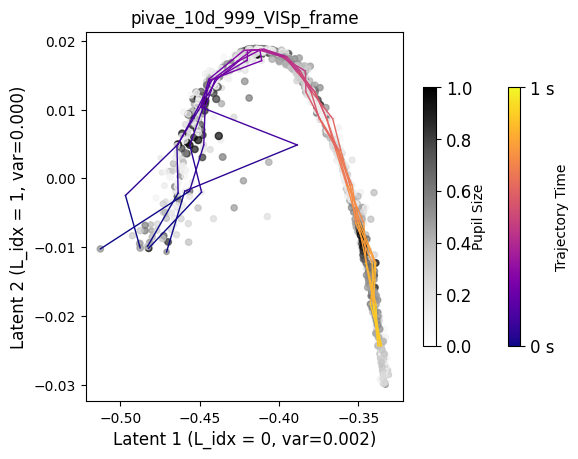

Latent 1 idx: 5
Latent 2 idx: 3


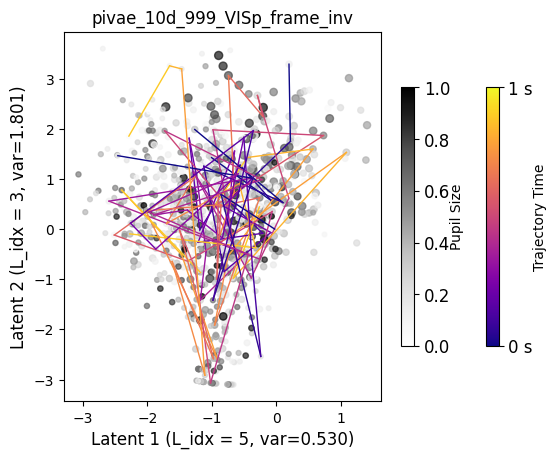

In [ ]:
plot_multi_latent_trajectory_pupil_v4(behavior_data_df, outputs, sorted_indices, workflow_name, variances=variances, num_stims=5, save_plot=False, save_dir=plot_dir, show_plot=SHOW_LATENT_PLOTS)